In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
PATCH_PATH = ('cylinder2_rgb')

In [3]:
X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)

Loaded /home/d/patches//cylinder2_rgb/ in 0.154430866241 seconds.


MemoryError: 

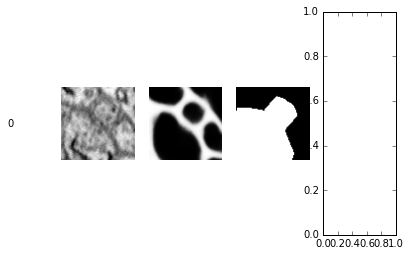

In [5]:
gp.Util.view_rgba(X_train[200], y_train[200])

In [6]:
cnn = nets.RGBNetPlus()

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout. This also includes more layers.
    


In [7]:
cnn = cnn.fit(X_train, y_train)

# Neural Network with 170898 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  conv3     48x15x15
  8  pool3     48x7x7
  9  dropout3  48x7x7
 10  conv4     48x5x5
 11  pool4     48x2x2
 12  dropout4  48x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.27873     0.24810    1.12346      0.90708  85.21s
      2     0.22028     0.21378    1.03039      0.92169  85.39s
      3     0.20895     0.19618    1.06504      0.92948  85.35s
      4     0.20218     0.18869    1.07149      0.93113  85.54s
      5     0.19603     0.18712    1.04762      0.93278  85.19s
      6     0.19252     0.17948    1.07266      0.93471  85.36s
      7     0.186

In [7]:
test_accuracy = cnn.score(X_test, y_test)

In [8]:
test_accuracy

0.9195725534308211

<module 'matplotlib.pyplot' from '/n/home05/haehn/nolearncox/lib/python2.7/site-packages/matplotlib-1.5.2-py2.7-linux-x86_64.egg/matplotlib/pyplot.pyc'>

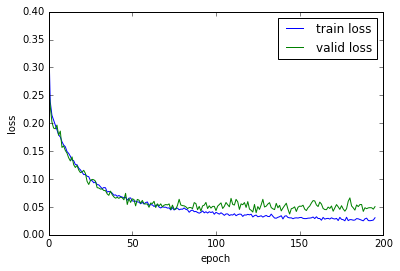

In [8]:
plot_loss(cnn)

In [9]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/RGBPlus_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)